# Fundamental of Simulation Methods
**Name**: Maximilian Richter

**Matrikel Number**: 3463789

**Student ID**: hy455

## Problem Set 9: Numerical hydrodynamics – part 2

### 9.1 Isothermal 1D hydrodynamics solver

### 1) Implement Upwind solver for isothermal Euler equations
### + 
### 2) Solve with constant time stepping

In [3]:
import numpy as np
import matplotlib.pyplot as plt

total time:  0.10050251256281371
total time:  10.050251256281388
total time:  20.100502512562723
total time:  30.05025125628114
total time:  40.10050251256237
total time:  50.05025125628079
total time:  60.10050251256202
total time:  70.05025125628043
total time:  80.10050251256166
total time:  90.05025125628008
total time:  100.1005025125613


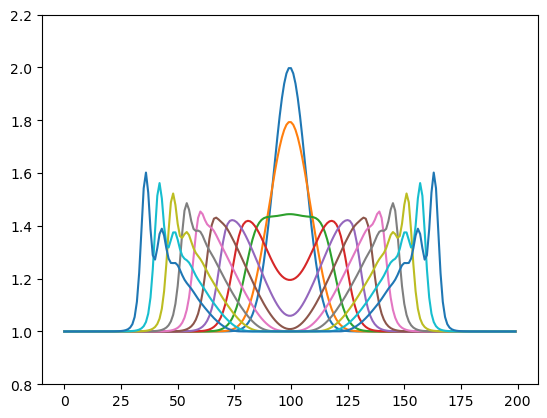

In [7]:
nx = 200
CFL = 0.1
c_sound = 1
plot_every = 10
time_max = 100

x = np.linspace(-100,100,nx)
dx = x[1] - x[0]

dt = CFL * dx/c_sound

# Initial conditions
rho = 1 + np.exp(-x**2/100)
u = np.zeros(x.shape)
momentum = rho*u 

U = np.array([rho, momentum]).T
F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

rho_result = []
total_time = 0
output_time = 0

while total_time < time_max:
    for i in range(1, nx-2):
        # Get left and right fluxes
        F_left = 0.5*(F[i-1] + F[i])
        F_right = 0.5*(F[i] + F[i+1])

        # Update state vector with Godunov scheme
        U[i] = U[i] - (dt/(2*dx)) * (F_left - F_right)

    # New state variables
    u = (U[:,1] / U[:,0]).copy()
    rho = U[:,0].copy()

    # New fluxes
    F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

    # Save for plotting
    rho_result.append(rho)

    # Get new time step by CFL criterion
    total_time += dt
    #dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    # Plot every 10 seconds
    if total_time > output_time * plot_every:
        print("total time: ", total_time)
        plt.plot(rho)
        plt.ylim(0.8,2.2)
        output_time += 1

### 3) Solve with variable time stepping

total time:  0.40201005025125486
total time:  10.321596765631408
total time:  20.146623928757414
total time:  30.253848407408707
total time:  40.02695093527779
total time:  50.013115028873486
total time:  60.10482168215358
total time:  70.2155880906125
total time:  80.02368798059914
total time:  90.04281750782478
total time:  100.22876030926986


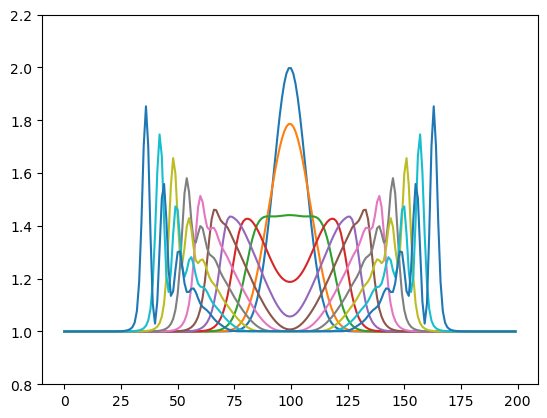

In [10]:
nx = 200
CFL = 0.4
c_sound = 1
plot_every = 10
time_max = 100

x = np.linspace(-100,100,nx)
dx = x[1] - x[0]

dt = CFL * dx/c_sound

# Initial conditions
rho = 1 + np.exp(-x**2/100)
u = np.zeros(x.shape)
momentum = rho*u 

U = np.array([rho, momentum]).T
F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

rho_result = []
total_time = 0
output_time = 0

while total_time < time_max:
    for i in range(1, nx-2):
        # Get left and right fluxes
        F_left = 0.5*(F[i-1] + F[i])
        F_right = 0.5*(F[i] + F[i+1])

        # Update state vector with Godunov scheme
        U[i] = U[i] - (dt/(2*dx)) * (F_left - F_right)

    # New state variables
    u = (U[:,1] / U[:,0]).copy()
    rho = U[:,0].copy()

    # New fluxes
    F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

    # Save for plotting
    rho_result.append(rho)

    # Get new time step by CFL criterion
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    # Plot every 10 seconds
    if total_time > output_time * plot_every:
        print("total time: ", total_time)
        plt.plot(rho)
        plt.ylim(0.8,2.2)
        output_time += 1

### 4) Create a movie

In [11]:
from maxpy.makegif import make_gif

def cback(data, name):
    plt.clf()
    plt.plot(data)
    plt.ylim(0.8,2.2)
    plt.savefig(name)

make_gif(cback, np.array(rho_result)[::3])

Save Images...


100%|██████████| 504/504 [00:35<00:00, 14.16it/s]


Done.
Make Gif...


100%|██████████| 504/504 [00:03<00:00, 141.56it/s]


Done.


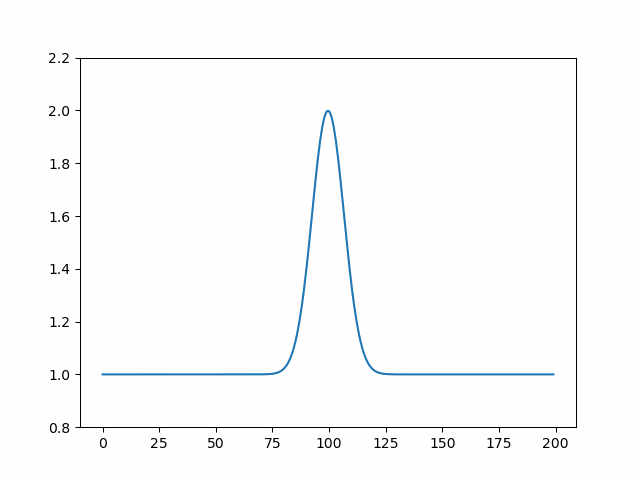

## 9.2 HLL Riemann Solver

I did not get it working :( I did not have so much time this week but maybe some aspects of the code are right :D 

total time:  0.2020202020202021


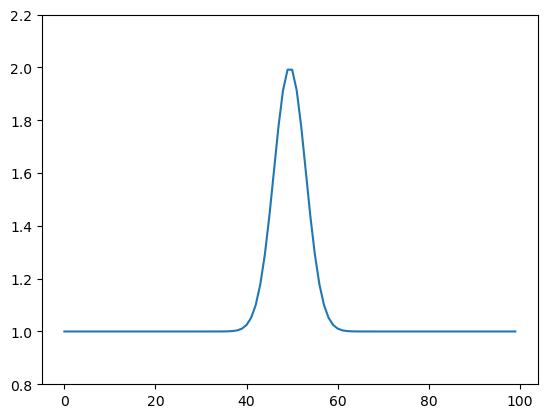

total time:  1.1960776245227902


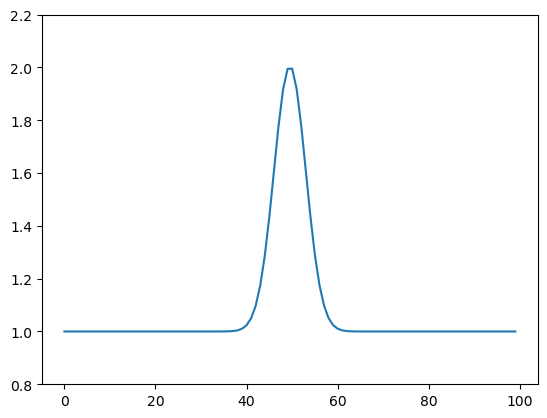

total time:  2.1644405171099432


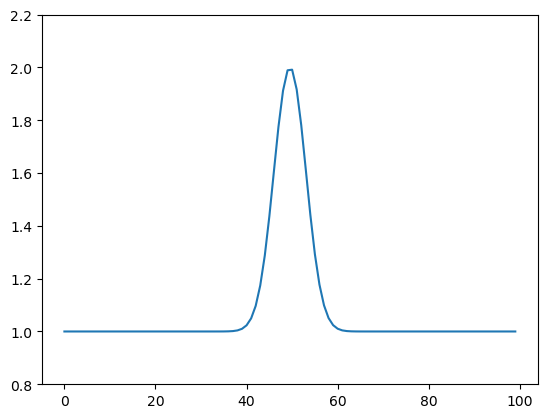

total time:  3.1082551520397272


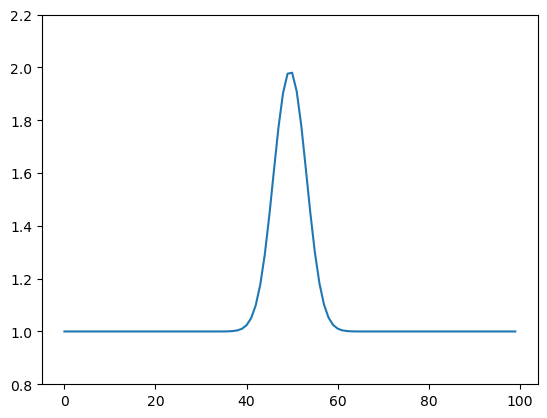

total time:  4.028741474401333


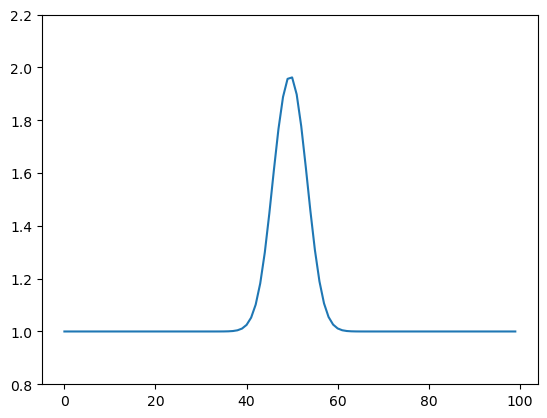

total time:  5.104456110807926


total time:  6.151285011286299


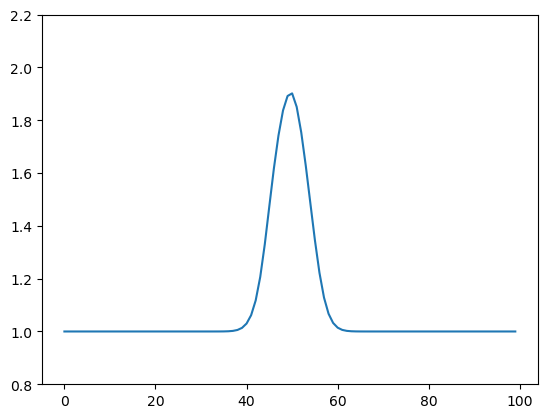

total time:  7.003950752024851


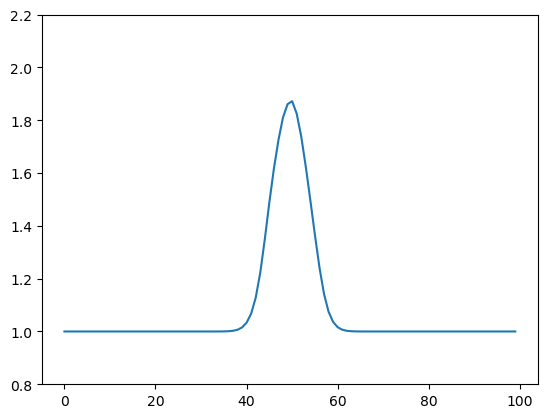

total time:  8.006577253325373


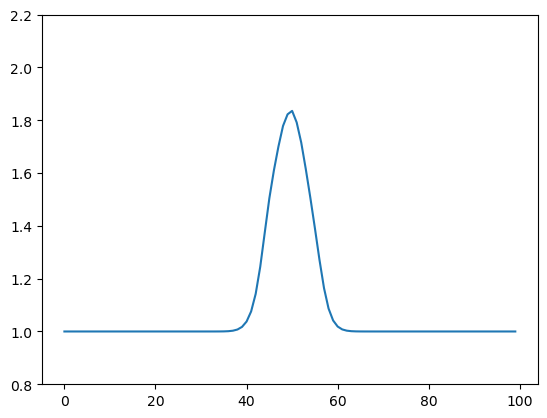

total time:  9.149171707874446


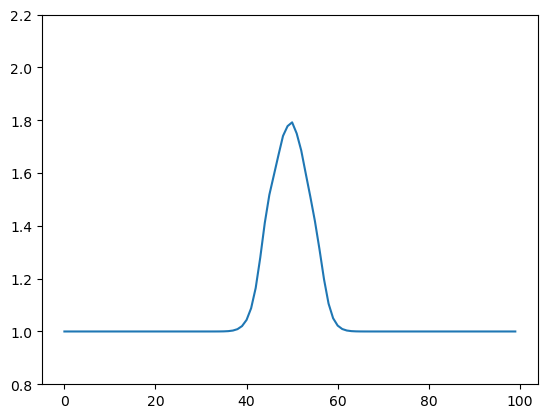

total time:  10.106600962157321


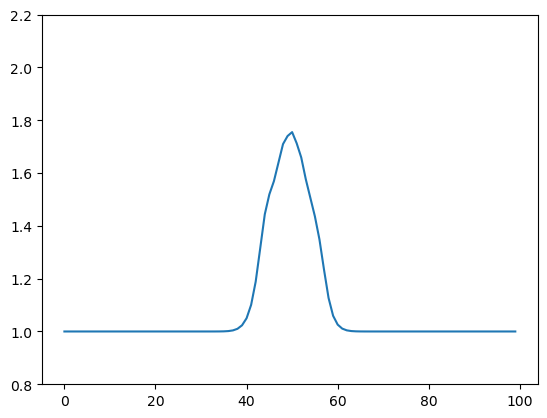

total time:  11.043107107163372


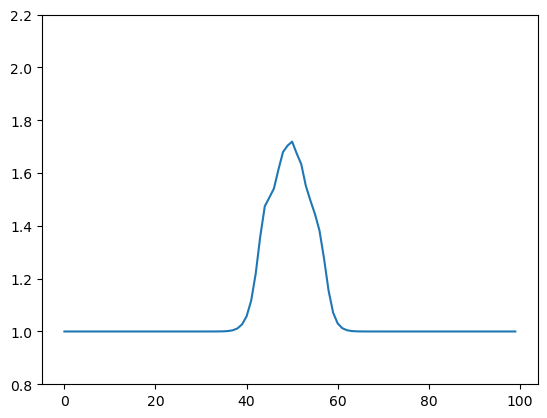

total time:  12.113521490081496


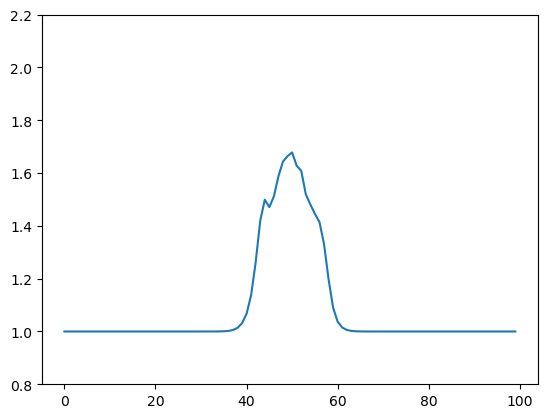

total time:  13.019058509897258


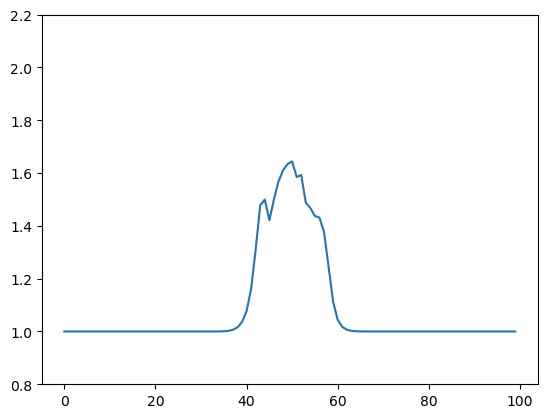

total time:  14.052172062338817


total time:  15.05557070387682


total time:  16.04104424339805


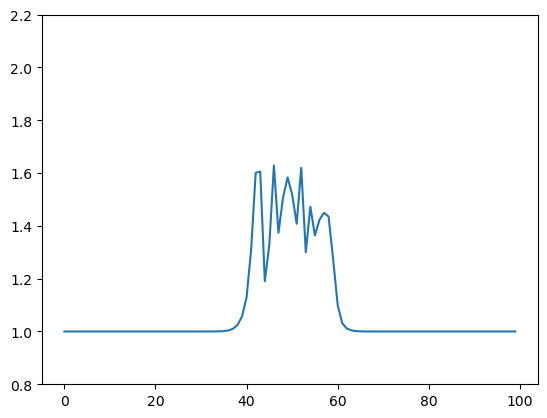

total time:  17.008890756477765


total time:  18.051382006883554


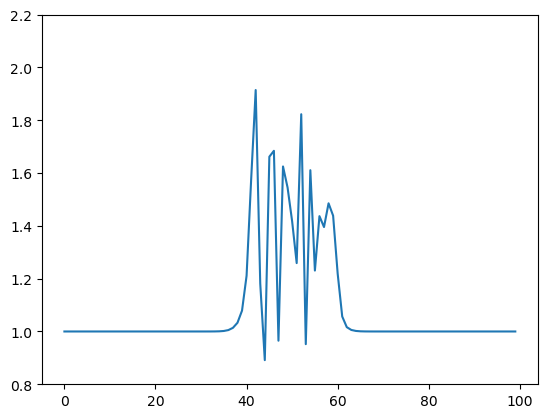

total time:  19.004451538327846


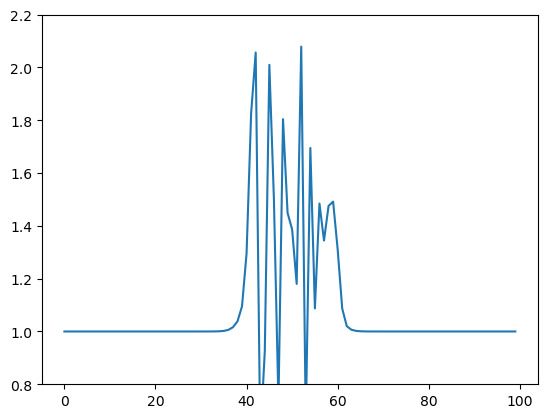

KeyboardInterrupt: 

In [18]:
def flux_function(u):
    """
    Flux function for the 1D isothermal Euler equations.
    """
    rho = u[0]
    velocity = u[1]
    return np.array([rho * velocity, rho * velocity**2 + c_sound**2*rho])

def hll_solver(ul, ur, fl, fr, a):
    """
    HLL approximate solver for the Riemann problem.
    
    Parameters:
        - ul: Left state
        - ur: Right state
        - fl: Flux function for the left state
        - fr: Flux function for the right state
        - a: Maximum wave speed (characteristic speed)
    
    Returns:
        - Resultant state at the interface
    """
    
    # Compute fluxes at the left and right states
    flux_l = fl(ul)
    flux_r = fr(ur)
    
    # Compute the maximum and minimum wave speeds
    lambda_max = np.max(np.abs(ur[1] / ur[0]) + a)
    lambda_min = np.min(np.abs(ul[1] / ul[0]) - a)
    
    # Compute the HLL flux
    if lambda_max <= 0:
        hll_flux = flux_l
    elif lambda_min >= 0:
        hll_flux = flux_r
    else:
        hll_flux = (lambda_max * flux_l - lambda_min * flux_r + lambda_max * lambda_min * (ur - ul)) / (lambda_max - lambda_min)
    
    return hll_flux

nx = 100 
x = np.linspace(-100, 100, nx)
dx = x[1] - x[0]
c_sound = 1

CFL = 0.1
dt = CFL * dx / c_sound


rho = 1 + np.exp(-x**2 / 100)
u = np.zeros(x.shape)
pressure = np.ones(x.shape)
momentum = rho * u 

U = np.array([rho, momentum]).T
rho_result = []

total_time = 0
output_time = 0

while total_time < 100:

    for i in range(1, nx-1):
        F_left = flux_function(U[i-1])
        F_right = flux_function(U[i])

        U[i] = U[i] - (dt / (2 * dx)) * (hll_solver(U[i-1], U[i], flux_function, flux_function, c_sound) - hll_solver(U[i], U[i+1], flux_function, flux_function, c_sound))

    u = (U[:, 1] / U[:, 0]).copy()
    rho = U[:, 0].copy()

    rho_result.append(rho)

    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    if total_time > output_time * 1:#ä in plot_times:
        print("total time: ", total_time)
        output_time += 1
        plt.plot(rho)
        #plot_times.pop(0)

        plt.ylim(0.8,2.2)
        plt.show()

# Plot the result
plt.plot(x, rho_result[-1])
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density distribution at t=100')
plt.show()